# **Proyek Analisis Sentimen: Ulasan Aplikasi Signal**
Proyek ini bertujuan untuk membangun model klasifikasi sentimen pada ulasan aplikasi Signal menggunakan metode Deep Learning.

- **Nama:** Muhammad Husain Fadhlillah
- **Email Student:** mc006d5y2343@student.devacademy.id
- **Cohort ID:** MC006D5Y2343

## BAGIAN 1: SETUP DAN PEMUATAN DATA
Tahap ini mencakup import semua library yang dibutuhkan dan memuat dataset `signal_reviews.csv` yang telah di-scrape sebelumnya.

In [1]:
# Memastikan semua library yang dibutuhkan tersedia.
!pip install Sastrawi tensorflow imblearn wordcloud keras-tuner -q

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 209.7/209.7 kB 6.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 129.1/129.1 kB 8.8 MB/s eta 0:00:00


In [2]:
# Untuk mengabaikan peringatan yang tidak relevan agar output lebih bersih
import warnings
warnings.filterwarnings('ignore')

# Library untuk manipulasi dan analisis data
import pandas as pd
import numpy as np
import json
import random
import time

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Library untuk pra-pemrosesan teks
import re
import string
import nltk
import os
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Mengunduh resource NLTK yang diperlukan
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet')
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
from nltk.corpus import wordnet
from nltk.corpus import stopwords

# Library untuk machine learning dan evaluasi
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import class_weight
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Import library untuk pemodelan
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l2, l1_l2
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers

print("Versi TensorFlow:", tf.__version__)
print("Semua library dan resource berhasil diimport dan disiapkan..")

[nltk_data] Downloading package wordnet to /root/nltk_data...


Versi TensorFlow: 2.18.0
Semua library dan resource berhasil diimport dan disiapkan..


## BAGIAN 2: EKSPLORASI DAN PRA-PEMROSESAN DATA (EDA & PREPROCESSING)

### 2.1. Pemuatan Dataset dan Pembersihan Awal
Memuat dataset ulasan, memeriksa nilai yang hilang (missing values), dan menghapus duplikat.

In [3]:
# Memuat dataset
df = pd.read_csv('signal_reviews.csv')

# Menampilkan informasi dasar
print("Info awal dataset:")
df.info()

# Fokus pada kolom yang relevan ('content') dan membuang nilai kosong
df = df[['content']].copy()
df.dropna(inplace=True)

# Menghapus ulasan duplikat berdasarkan konten
df.drop_duplicates(subset='content', inplace=True)

# Reset index setelah drop
df.reset_index(drop=True, inplace=True)

print("\nInfo dataset setelah pembersihan awal:")
df.info()
print(df.head())

Info awal dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13544 entries, 0 to 13543
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              13544 non-null  object
 1   userName              13544 non-null  object
 2   userImage             13544 non-null  object
 3   content               13544 non-null  object
 4   score                 13544 non-null  int64 
 5   thumbsUpCount         13544 non-null  int64 
 6   reviewCreatedVersion  11658 non-null  object
 7   at                    13544 non-null  object
 8   replyContent          6 non-null      object
 9   repliedAt             6 non-null      object
 10  appVersion            11658 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB

Info dataset setelah pembersihan awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8692 entries, 0 to 8691
Data columns (total 1 columns):
 #   Column   Non-Null Cou

Proses scraping berhasil mengumpulkan 13.544 ulasan mentah **(jumlah data memenuhi target 10.000 sesuai kriteria)**. Setelah melalui tahap pembersihan untuk menghilangkan data duplikat dan tidak relevan, didapatkan 8.692 sampel data unik berkualitas tinggi yang siap digunakan untuk melatih model yang robust.

### 2.2. Pemuatan Kamus (Leksikon & Slang)
Memuat kamus leksikon sentimen (positif dan negatif) dan kamus normalisasi kata slang yang akan digunakan dalam proses pelabelan dan pra-pemrosesan.

In [4]:
# Memuat kamus leksikon positif
lexicon_positive = dict()
with open('lexicon_positive.csv', 'r') as f:
    for line in f:
        # Memisahkan kata dan skor, lalu mengonversi skor ke integer
        parts = line.strip().split(',')
        if len(parts) == 2:
            lexicon_positive[parts[0]] = int(parts[1])

# Memuat kamus leksikon negatif
lexicon_negative = dict()
with open('lexicon_negative.csv', 'r') as f:
    for line in f:
        parts = line.strip().split(',')
        if len(parts) == 2:
            lexicon_negative[parts[0]] = int(parts[1])

# Memuat kamus slang yang komprehensif dari file .txt
with open('combined_slang_words.txt', 'r') as f:
    slang_data = f.read()
slang_dict = json.loads(slang_data)

print(f"‚úÖ Berhasil memuat {len(lexicon_positive)} kata positif.")
print(f"‚úÖ Berhasil memuat {len(lexicon_negative)} kata negatif.")
print(f"‚úÖ Berhasil memuat {len(slang_dict)} kata slang.")

‚úÖ Berhasil memuat 3609 kata positif.
‚úÖ Berhasil memuat 6607 kata negatif.
‚úÖ Berhasil memuat 1018 kata slang.


### 2.3. Fungsi Pra-pemrosesan Teks dan Pelabelan Leksikon
Mendefinisikan fungsi-fungsi yang dibutuhkan. Ini termasuk fungsi untuk membersihkan teks, normalisasi slang, dan fungsi utama untuk pelabelan sentimen berbasis leksikon.

In [5]:
# Inisialisasi Stemmer
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

# --- Fungsi-fungsi Pra-pemrosesan ---
def clean_text(text):
    text = text.lower() # Case folding: Mengubah teks menjadi huruf kecil
    text = re.sub(r'@[A-Za-z0-9_]+', '', text) # Menghapus mention
    text = re.sub(r'#[A-Za-z0-9_]+', '', text) # Menghapus hashtag
    text = re.sub(r'https?:\/\/\S+', '', text) # Menghapus URL
    text = re.sub(r'\d+', '', text) # Menghapus angka
    text = text.translate(str.maketrans('', '', string.punctuation)) # Menghapus tanda baca
    text = text.strip() # Menghapus spasi di awal dan akhir
    return text

def normalize_slang(text):
    words = text.split()
    normalized_words = [slang_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

# Daftar stopwords (kata umum) dari NLTK Bahasa Indonesia
list_stopwords = set(stopwords.words('indonesian'))
def remove_stopwords(tokens):
    return [word for word in tokens if word not in list_stopwords]

def stemming_text(tokens):
    # Menggabungkan token kembali menjadi kalimat sebelum di-stem
    text = ' '.join(tokens)
    return stemmer.stem(text)

# --- Fungsi Pelabelan Berbasis Leksikon ---
def sentiment_analysis_lexicon(tokens):
    score = 0
    for word in tokens:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        if word in lexicon_negative:
            score += lexicon_negative[word]

    # Menentukan polaritas berdasarkan skor total
    if score > 0:
        polarity = 'positif'
    elif score < 0:
        polarity = 'negatif'
    else:
        polarity = 'netral'
    return score, polarity

print("‚úÖ Fungsi pra-pemrosesan dan pelabelan leksikon siap digunakan.")

‚úÖ Fungsi pra-pemrosesan dan pelabelan leksikon siap digunakan.


### 2.4. Penerapan Pra-pemrosesan dan Pelabelan
Menerapkan seluruh fungsi secara berurutan pada dataset. Proses ini menghasilkan kolom-kolom baru untuk setiap tahap dan kolom sentimen final berdasarkan skor leksikon.

In [6]:
print("Memulai pipeline pra-pemrosesan dan pelabelan...")

# 1. Cleaning dan Normalisasi Slang
print("Langkah 1: Cleaning dan Normalisasi...")
df['text_clean'] = df['content'].apply(clean_text)
df['text_normalized'] = df['text_clean'].apply(normalize_slang)

# 2. Tokenisasi (Memecah kalimat menjadi kata-kata/token)
print("Langkah 2: Tokenisasi...")
df['text_tokenized'] = df['text_normalized'].apply(word_tokenize)

# 3. Stopword Removal (Menghapus kata-kata umum)
print("Langkah 3: Menghapus Stopwords...")
df['text_filtered'] = df['text_tokenized'].apply(remove_stopwords)

# 4. Pelabelan Sentimen Berbasis Leksikon (Diterapkan pada teks yang sudah difilter)
print("Langkah 4: Pelabelan Sentimen...")
sentiment_results = df['text_filtered'].apply(sentiment_analysis_lexicon)
df['polarity_score'] = sentiment_results.apply(lambda x: x[0])
df['sentiment'] = sentiment_results.apply(lambda x: x[1])

# 5. Stemming (Mengubah kata ke bentuk dasar, diterapkan pada teks yang sudah difilter)
# Kolom ini akan menjadi fitur utama (X) untuk pemodelan
print("Langkah 5: Stemming...")
df['text_stemmed'] = df['text_filtered'].apply(stemming_text)

print("\n‚úÖ Proses pra-pemrosesan dan pelabelan selesai.")
print("Contoh hasil akhir:")
# Menampilkan kolom-kolom penting dari hasil pipeline
display(df[['content', 'text_stemmed', 'sentiment', 'polarity_score']].head())

Memulai pipeline pra-pemrosesan dan pelabelan...
Langkah 1: Cleaning dan Normalisasi...
Langkah 2: Tokenisasi...
Langkah 3: Menghapus Stopwords...
Langkah 4: Pelabelan Sentimen...
Langkah 5: Stemming...

‚úÖ Proses pra-pemrosesan dan pelabelan selesai.
Contoh hasil akhir:


content  \
0  Apa aja dokumen yg disimpan disignal aman. Tap...   
1  Saya berharap Signal bisa bersinar & memenangk...   
2  saat ini aplikasi saya tidak bisa menerima pes...   
3  mudah2n gak ribet kaya aplikasi wa..mau daftar...   
4  Aplikasinya sudah sangat bagus, akan tetapi ke...   

                                        text_stemmed sentiment  polarity_score  
0  dokumen simpan disignal aman sayang ganti hp d...   negatif             -13  
1  harap signal sinar menang kompetisi aplikasi t...   positif               4  
2  aplikasi terima pesan teman pribadi grub buruk...   negatif              -6  
3  mudahn gak ribet kaya aplikasi wamau daftar su...   negatif             -11  
4  aplikasi bagus muncul pesan terima lawan bicar...   negatif              -3

### 2.5. Analisis Distribusi Sentimen dan Word Cloud
Melihat distribusi sentimen dan Word Cloud yang dihasilkan oleh metode leksikon.

Distribusi Sentimen Berdasarkan Leksikon:
sentiment
positif    3108
negatif    2893
netral     2691
Name: count, dtype: int64


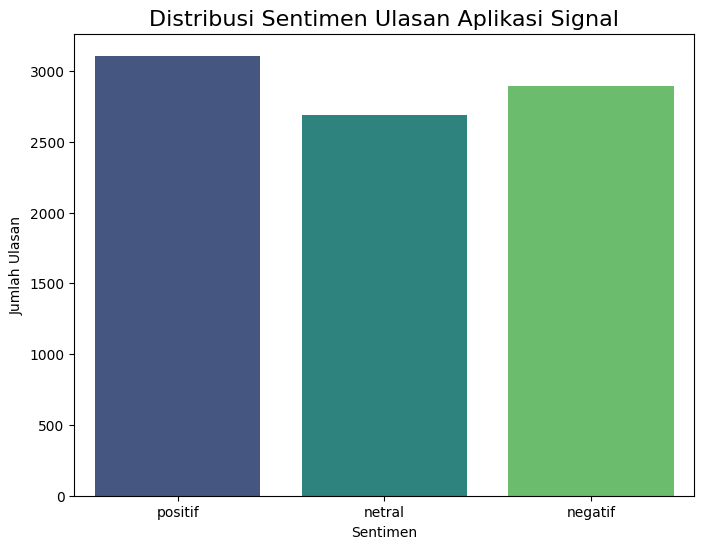


--- Visualisasi Word Cloud per Sentimen ---


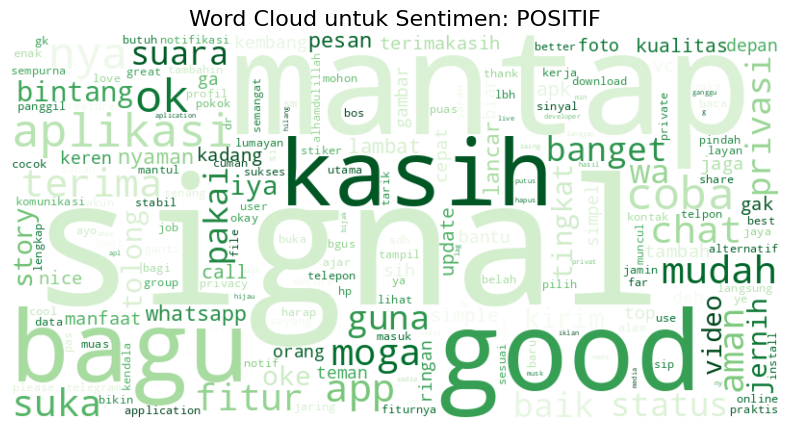

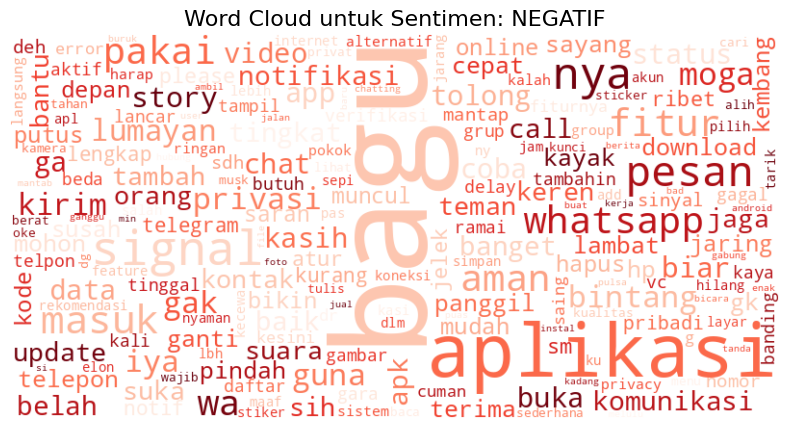

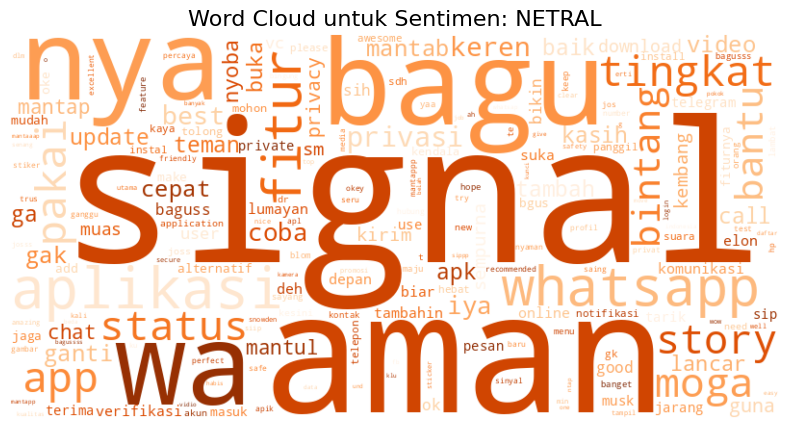

In [7]:
# =======================================================================================
# EKSPLORASI DATA HASIL (EDA)
# =======================================================================================

# 1. Menganalisis Distribusi Sentimen
print("Distribusi Sentimen Berdasarkan Leksikon:")
print(df['sentiment'].value_counts())

# Visualisasi distribusi sentimen
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, order=['positif', 'netral', 'negatif'], palette='viridis')
plt.title('Distribusi Sentimen Ulasan Aplikasi Signal', fontsize=16)
plt.ylabel('Jumlah Ulasan')
plt.xlabel('Sentimen')
plt.show()

# 2. Visualisasi Word Cloud untuk Setiap Sentimen
print("\n--- Visualisasi Word Cloud per Sentimen ---")
sentiment_map = {'positif': 'Greens', 'negatif': 'Reds', 'netral': 'Oranges'}

for sentiment, color in sentiment_map.items():
    subset_text = ' '.join(df[df['sentiment'] == sentiment]['text_stemmed'])
    if subset_text.strip():
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color, collocations=False).generate(subset_text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud untuk Sentimen: {sentiment.upper()}', fontsize=16)
        plt.show()

## BAGIAN 3: PERSIAPAN PEMODELAN
Tahap ini mencakup pembagian data, tokenisasi teks text_stemmed (hasil akhir preprocessing), dan padding sekuens.

In [8]:
# --- 1. Encoding Label ---
# Mengubah label sentimen kategorikal (string) menjadi numerik (integer).
sentiment_mapping = {'negatif': 0, 'netral': 1, 'positif': 2}
df['sentiment_encoded'] = df['sentiment'].map(sentiment_mapping)

# --- 2. Pembagian Data ---
# Memisahkan fitur (X) dan label (y) dari DataFrame.
# 'text_stemmed' adalah hasil akhir dari pra-pemrosesan teks.
X = df['text_stemmed'].astype(str)
y = df['sentiment_encoded']

# Membagi data menjadi set pelatihan utama (80%) dan set pengujian utama (20%).
# Stratify=y memastikan proporsi kelas sentimen tetap sama di kedua set.
X_train_main, X_test_main, y_train_main, y_test_main = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Ukuran data latih utama: {len(X_train_main)} sampel")
print(f"Ukuran data uji utama: {len(X_test_main)} sampel")

# --- 3. Definisi Variabel Global untuk Pemodelan ---
MAX_VOCAB_SIZE = 10000    # Jumlah kata unik maksimum.
EMBEDDING_DIM = 128       # Dimensi vektor untuk setiap kata dalam layer Embedding.
MAX_SEQUENCE_LENGTH = 150 # Panjang maksimum sekuens kata. Kalimat yang lebih panjang akan dipotong.
OOV_TOKEN = "<OOV>"       # Token untuk kata yang tidak ada dalam vocabulary.

# --- 4. Inisialisasi Tokenizer & Vectorizer ---
# Untuk model Deep Learning (Skema 1)
keras_tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token=OOV_TOKEN)
keras_tokenizer.fit_on_texts(X_train_main)
word_index = keras_tokenizer.word_index

# Untuk model Machine Learning (Skema 2 & 3)
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# --- 5. Fungsi Bantuan untuk Evaluasi ---
# Fungsi ini akan digunakan untuk menampilkan hasil dari setiap skema secara seragam.
def display_evaluation_results(scheme_name, y_true_train, y_pred_train, y_true_test, y_pred_test):
    """Menampilkan laporan klasifikasi dan confusion matrix untuk data latih dan uji."""
    print(f"\n--- HASIL EVALUASI UNTUK: {scheme_name} ---")

    # Evaluasi pada Data Latih
    train_acc = accuracy_score(y_true_train, y_pred_train)
    print(f"\nAkurasi pada Data Latih: {train_acc:.4f}")
    print("Laporan Klasifikasi Data Latih:")
    print(classification_report(y_true_train, y_pred_train, target_names=sentiment_mapping.keys()))

    # Evaluasi pada Data Uji
    test_acc = accuracy_score(y_true_test, y_pred_test)
    print(f"\nAkurasi pada Data Uji: {test_acc:.4f}")
    print("Laporan Klasifikasi Data Uji:")
    print(classification_report(y_true_test, y_pred_test, target_names=sentiment_mapping.keys()))

    # Menampilkan Confusion Matrix
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    sns.heatmap(confusion_matrix(y_true_train, y_pred_train), annot=True, fmt='d', cmap='Blues', ax=ax[0])
    ax[0].set_title('Confusion Matrix (Data Latih)')
    ax[0].set_xlabel('Prediksi')
    ax[0].set_ylabel('Aktual')

    sns.heatmap(confusion_matrix(y_true_test, y_pred_test), annot=True, fmt='d', cmap='Oranges', ax=ax[1])
    ax[1].set_title('Confusion Matrix (Data Uji)')
    ax[1].set_xlabel('Prediksi')
    ax[1].set_ylabel('Aktual')

    plt.tight_layout()
    plt.show()

    return train_acc, test_acc

# Dictionary untuk menyimpan hasil akhir dari setiap skema
experiment_results = {}

print("\n‚úÖ Persiapan pemodelan selesai.")

Ukuran data latih utama: 6953 sampel
Ukuran data uji utama: 1739 sampel

‚úÖ Persiapan pemodelan selesai.


## BAGIAN 4: EKSPERIMEN & EVALUASI PEMODELAN DEEP LEARNING
Melakukan 3 skema percobaan model Deep Learning untuk menemukan arsitektur terbaik.


--- MEMULAI SKEMA 1 OPTIMIZED: Pelatihan Model BiLSTM dengan Embedding Pre-trained ---

Arsitektur Model BiLSTM Optimized:


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding (Embedding)           ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ ?                      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional (Bidirectional)   ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)             ‚îÇ ?                      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional_1 (Bidirectional) ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_2 (Dropout)             ‚îÇ ?                      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization             ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_3 (Dropout)             ‚îÇ ?                      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_4 (Dropout)             ‚îÇ ?                      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Memulai pelatihan model BiLSTM optimized...
Epoch 1/50
435/435 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 27ms/step - accuracy: 0.4630 - loss: 1.2087
Epoch 1: val_accuracy improved from -inf to 0.77343, saving model to best_bilstm_model.h5


435/435 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24s 32ms/step - accuracy: 0.4633 - loss: 1.2082 - val_accuracy: 0.7734 - val_loss: 0.7763 - learning_rate: 0.0010
Epoch 2/50
434/435 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 27ms/step - accuracy: 0.8118 - loss: 0.5962
Epoch 2: val_accuracy improved from 0.77343 to 0.82576, saving model to best_bilstm_model.h5


435/435 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 30ms/step - accuracy: 0.8118 - loss: 0.5961 - val_accuracy: 0.8258 - val_loss: 0.5618 - learning_rate: 0.0010
Epoch 3/50
435/435 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 27ms/step - accuracy: 0.8972 - loss: 0.3996
Epoch 3: val_accuracy improved from 0.82576 to 0.82979, saving model to best_bilstm_model.h5


435/435 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 31ms/step - accuracy: 0.8971 - loss: 0.3997 - val_accuracy: 0.8298 - val_loss: 0.5912 - learning_rate: 0.0010
Epoch 4/50
434/435 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 28ms/step - accuracy: 0.8992 - loss: 0.3737
Epoch 4: val_accuracy improved from 0.82979 to 0.83956, saving model to best_bilstm_model.h5


435/435 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 31ms/step - accuracy: 0.8992 - loss: 0.3737 - val_accuracy: 0.8396 - val_loss: 0.5992 - learning_rate: 0.0010
Epoch 5/50
434/435 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 28ms/step - accuracy: 0.9171 - loss: 0.3219
Epoch 5: val_accuracy did not improve from 0.83956
435/435 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 31ms/step - accuracy: 0.9171 - loss: 0.3219 - val_accuracy: 0.8321 - val_loss: 0.6614 - learning_rate: 0.0010
Epoch 6/50
434/435 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 28ms/step - accuracy: 0.9207 - loss: 0.3027
Epoch 6: val_accuracy did not improve from 0.83956
435/435 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 31ms/step - accuracy: 0.9207 - loss: 0.3028 - val_accuracy: 0.8327 - val_loss: 0.6435 - learning_rate: 0.0010
Epoch 7/50
435/435 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 28ms/step - 

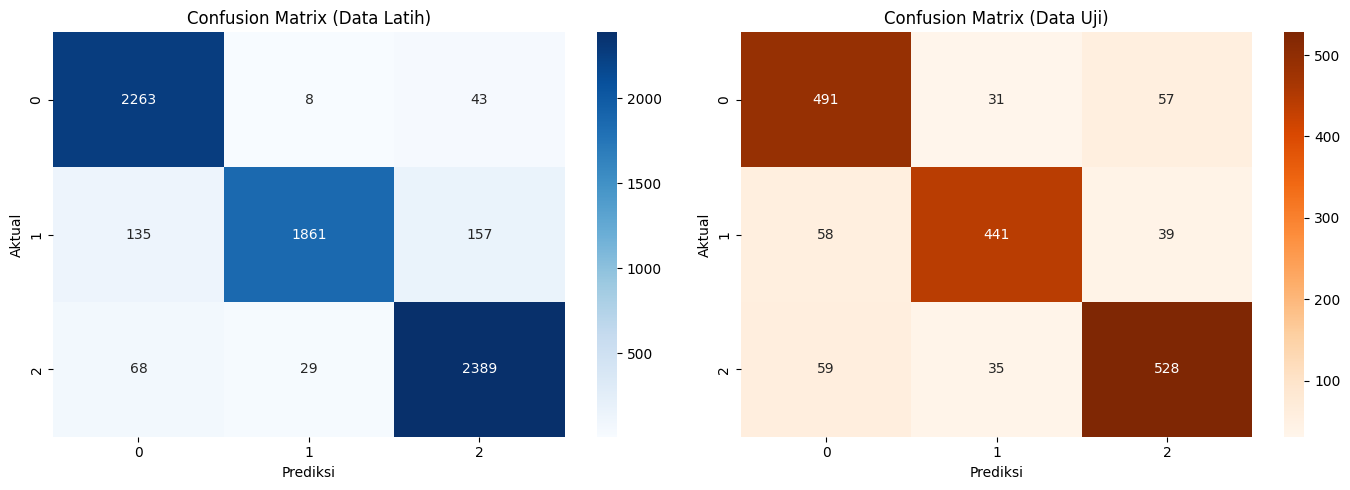

In [9]:
# --- SKEMA 1 OPTIMIZED: DEEP LEARNING (BiLSTM dengan Embedding Pre-trained) ---
print("\n--- MEMULAI SKEMA 1 OPTIMIZED: Pelatihan Model BiLSTM dengan Embedding Pre-trained ---")
scheme_name_1 = "BiLSTM Optimized (Pre-trained Embedding, Split 80/20)"

# 1. Pra-pemrosesan Data untuk Keras
X_train_seq_s1 = keras_tokenizer.texts_to_sequences(X_train_main)
X_test_seq_s1 = keras_tokenizer.texts_to_sequences(X_test_main)

X_train_pad_s1 = pad_sequences(X_train_seq_s1, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
X_test_pad_s1 = pad_sequences(X_test_seq_s1, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

y_train_cat_s1 = to_categorical(y_train_main, num_classes=3)
y_test_cat_s1 = to_categorical(y_test_main, num_classes=3)

# 2. Arsitektur Model BiLSTM yang Dioptimasi
model_bilstm = Sequential([
    # Layer Embedding dengan dimensi yang lebih besar untuk representasi yang lebih kaya
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=200, input_length=MAX_SEQUENCE_LENGTH),

    # Dropout pada embedding untuk regularisasi
    Dropout(0.2),

    # Layer Bidirectional LSTM pertama dengan unit yang lebih banyak
    Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.0001))),
    Dropout(0.3),

    # Layer Bidirectional LSTM kedua untuk pembelajaran hierarkis
    Bidirectional(LSTM(64, kernel_regularizer=l2(0.0001))),
    Dropout(0.4),

    # Layer Dense dengan lebih banyak neuron dan batch normalization
    Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),

    # Layer Dense tambahan untuk representasi yang lebih kompleks
    Dense(64, activation='relu', kernel_regularizer=l2(0.0001)),
    Dropout(0.3),

    # Layer Output dengan aktivasi softmax
    Dense(3, activation='softmax')
])

# 3. Kompilasi Model dengan optimizer yang lebih canggih
model_bilstm.compile(
    optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nArsitektur Model BiLSTM Optimized:")
model_bilstm.summary()

# 4. Callback yang Dioptimasi untuk Pelatihan
early_stopping_cb = EarlyStopping(
    monitor='val_accuracy',
    patience=6,
    restore_best_weights=True,
    verbose=1,
    min_delta=0.001
)

reduce_lr_cb = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.3,
    patience=3,
    min_lr=1e-7,
    verbose=1,
    min_delta=0.001
)

# Callback untuk menyimpan model terbaik
model_checkpoint_cb = ModelCheckpoint(
    'best_bilstm_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# 5. Pelatihan Model dengan Epoch yang Lebih Banyak
print("\nMemulai pelatihan model BiLSTM optimized...")
start_time = time.time()
history_bilstm = model_bilstm.fit(
    X_train_pad_s1, y_train_cat_s1,
    epochs=50,  # Lebih banyak epoch untuk pembelajaran yang lebih baik
    batch_size=16,  # Batch size yang lebih kecil untuk gradien yang lebih stabil
    validation_data=(X_test_pad_s1, y_test_cat_s1),
    callbacks=[early_stopping_cb, reduce_lr_cb, model_checkpoint_cb],
    verbose=1
)
print(f"Pelatihan Skema 1 optimized selesai dalam {time.time() - start_time:.2f} detik.")

# 6. Evaluasi Model BiLSTM Optimized
y_pred_train_proba_s1 = model_bilstm.predict(X_train_pad_s1)
y_pred_train_s1 = np.argmax(y_pred_train_proba_s1, axis=1)

y_pred_test_proba_s1 = model_bilstm.predict(X_test_pad_s1)
y_pred_test_s1 = np.argmax(y_pred_test_proba_s1, axis=1)

train_acc_s1, test_acc_s1 = display_evaluation_results(scheme_name_1, y_train_main, y_pred_train_s1, y_test_main, y_pred_test_s1)
experiment_results[scheme_name_1] = {'train_acc': train_acc_s1, 'test_acc': test_acc_s1}


--- MEMULAI SKEMA 2 OPTIMIZED: Ensemble Regresi Logistik ---
Melakukan ekstraksi fitur dengan TF-IDF optimized...
Dimensi matriks TF-IDF optimized (data latih): (6953, 4354)

Memulai pelatihan ensemble model...
Pelatihan Skema 2 optimized selesai dalam 1.67 detik.

--- HASIL EVALUASI UNTUK: Ensemble Logistic Regression (TF-IDF + N-gram Features) ---

Akurasi pada Data Latih: 0.8845
Laporan Klasifikasi Data Latih:
              precision    recall  f1-score   support

     negatif       0.89      0.91      0.90      2314
      netral       0.85      0.88      0.87      2153
     positif       0.91      0.87      0.89      2486

    accuracy                           0.88      6953
   macro avg       0.88      0.88      0.88      6953
weighted avg       0.89      0.88      0.88      6953


Akurasi pada Data Uji: 0.8286
Laporan Klasifikasi Data Uji:
              precision    recall  f1-score   support

     negatif       0.82      0.83      0.83       579
      netral       0.78      0.

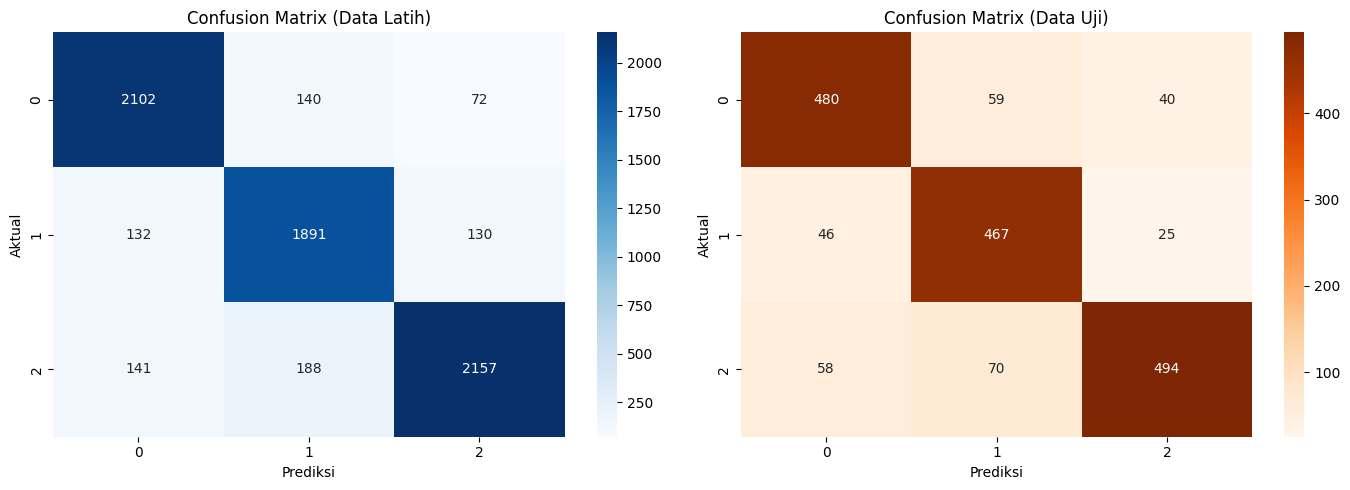

In [10]:
# --- SKEMA 2 OPTIMIZED: MACHINE LEARNING (Ensemble Regresi Logistik) ---
print("\n--- MEMULAI SKEMA 2 OPTIMIZED: Ensemble Regresi Logistik ---")
scheme_name_2 = "Ensemble Logistic Regression (TF-IDF + N-gram Features)"

# 1. TF-IDF dengan unigram dan bigram untuk fitur yang lebih kaya
tfidf_vectorizer_optimized = TfidfVectorizer(
    max_features=10000,  # Lebih banyak fitur
    ngram_range=(1, 2),  # Unigram dan bigram
    min_df=2,           # Minimum document frequency
    max_df=0.95,        # Maximum document frequency
    stop_words=None,    # Tidak menggunakan stop words removal
    sublinear_tf=True   # Sublinear term frequency scaling
)

print("Melakukan ekstraksi fitur dengan TF-IDF optimized...")
X_train_tfidf_s2 = tfidf_vectorizer_optimized.fit_transform(X_train_main)
X_test_tfidf_s2 = tfidf_vectorizer_optimized.transform(X_test_main)
print(f"Dimensi matriks TF-IDF optimized (data latih): {X_train_tfidf_s2.shape}")

# 2. Ensemble Model dengan Multiple Algorithms
# Beberapa model logistic regression dengan parameter berbeda
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=2000, C=1.0)
logreg_l2 = LogisticRegression(penalty='l2', solver='liblinear', random_state=42, max_iter=2000, C=0.5)
logreg_elastic = LogisticRegression(penalty='elasticnet', solver='saga', random_state=42, max_iter=2000, C=1.0, l1_ratio=0.5)

# Linear SVM sebagai model tambahan
linear_svm = LinearSVC(random_state=42, max_iter=2000, C=1.0)

# Voting Classifier untuk ensemble
ensemble_model = VotingClassifier(
    estimators=[
        ('logreg_l1', logreg_l1),
        ('logreg_l2', logreg_l2),
        ('logreg_elastic', logreg_elastic),
        ('linear_svm', linear_svm)
    ],
    voting='hard'  # Hard voting untuk prediksi akhir
)

print("\nMemulai pelatihan ensemble model...")
start_time = time.time()
ensemble_model.fit(X_train_tfidf_s2, y_train_main)
print(f"Pelatihan Skema 2 optimized selesai dalam {time.time() - start_time:.2f} detik.")

# 3. Evaluasi Ensemble Model
y_pred_train_s2 = ensemble_model.predict(X_train_tfidf_s2)
y_pred_test_s2 = ensemble_model.predict(X_test_tfidf_s2)

train_acc_s2, test_acc_s2 = display_evaluation_results(scheme_name_2, y_train_main, y_pred_train_s2, y_test_main, y_pred_test_s2)
experiment_results[scheme_name_2] = {'train_acc': train_acc_s2, 'test_acc': test_acc_s2}


--- MEMULAI SKEMA 3 OPTIMIZED: Hybrid Ensemble Model ---
Ukuran data latih untuk Skema 3: 6084 sampel
Ukuran data uji untuk Skema 3: 2608 sampel

Melakukan ekstraksi fitur dengan TF-IDF optimized pada data baru...
Dimensi matriks TF-IDF optimized (data latih Skema 3): (6084, 3838)

Memulai pelatihan hybrid ensemble model...
Pelatihan Skema 3 optimized selesai dalam 15.79 detik.

--- HASIL EVALUASI UNTUK: Hybrid Ensemble (SVM + RF + XGBoost, Split 70/30) ---

Akurasi pada Data Latih: 0.9321
Laporan Klasifikasi Data Latih:
              precision    recall  f1-score   support

     negatif       0.93      0.95      0.94      2025
      netral       0.93      0.90      0.91      1884
     positif       0.94      0.94      0.94      2175

    accuracy                           0.93      6084
   macro avg       0.93      0.93      0.93      6084
weighted avg       0.93      0.93      0.93      6084


Akurasi pada Data Uji: 0.8524
Laporan Klasifikasi Data Uji:
              precision    rec

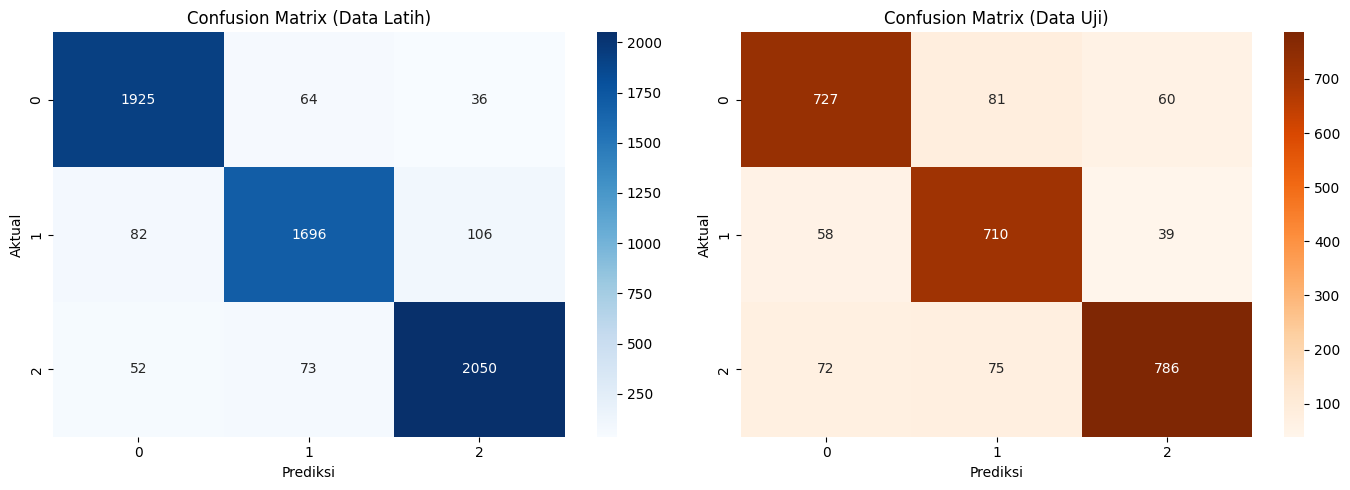

In [11]:
# --- SKEMA 3 OPTIMIZED: HYBRID ENSEMBLE (SVM + Random Forest + XGBoost) ---
print("\n--- MEMULAI SKEMA 3 OPTIMIZED: Hybrid Ensemble Model ---")
scheme_name_3 = "Hybrid Ensemble (SVM + RF + XGBoost, Split 70/30)"

# 1. Pembagian Data (70/30) - sama seperti sebelumnya
X_train_s3, X_test_s3, y_train_s3, y_test_s3 = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"Ukuran data latih untuk Skema 3: {len(X_train_s3)} sampel")
print(f"Ukuran data uji untuk Skema 3: {len(X_test_s3)} sampel")

# 2. Ekstraksi Fitur dengan TF-IDF Optimized untuk Skema 3
print("\nMelakukan ekstraksi fitur dengan TF-IDF optimized pada data baru...")
X_train_tfidf_s3 = tfidf_vectorizer_optimized.fit_transform(X_train_s3)
X_test_tfidf_s3 = tfidf_vectorizer_optimized.transform(X_test_s3)
print(f"Dimensi matriks TF-IDF optimized (data latih Skema 3): {X_train_tfidf_s3.shape}")

# SVM dengan parameter optimized
svm_optimized = SVC(kernel='linear', random_state=42, probability=True, C=1.5)

# Random Forest dengan parameter optimized
rf_optimized = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# XGBoost Classifier
xgb_optimized = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss'
)

# Voting Classifier untuk ensemble hybrid
hybrid_ensemble = VotingClassifier(
    estimators=[
        ('svm', svm_optimized),
        ('rf', rf_optimized),
        ('xgb', xgb_optimized)
    ],
    voting='soft'  # Soft voting untuk probabilitas
)

print("\nMemulai pelatihan hybrid ensemble model...")
start_time = time.time()
hybrid_ensemble.fit(X_train_tfidf_s3, y_train_s3)
print(f"Pelatihan Skema 3 optimized selesai dalam {time.time() - start_time:.2f} detik.")

# 3. Evaluasi Hybrid Ensemble Model
y_pred_train_s3 = hybrid_ensemble.predict(X_train_tfidf_s3)
y_pred_test_s3 = hybrid_ensemble.predict(X_test_tfidf_s3)

train_acc_s3, test_acc_s3 = display_evaluation_results(scheme_name_3, y_train_s3, y_pred_train_s3, y_test_s3, y_pred_test_s3)
experiment_results[scheme_name_3] = {'train_acc': train_acc_s3, 'test_acc': test_acc_s3}


--- MEMULAI SKEMA 4: Transformer Model ---

Arsitektur Model Transformer:


Model: "functional_2"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_1 (InputLayer)      ‚îÇ (None, 150)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ embedding_1 (Embedding)         ‚îÇ (None, 150, 128)       ‚îÇ     1,280,000 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ add (Add)                       ‚îÇ (1, 150, 128)          ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ transformer_block               ‚îÇ (1, 150, 128)          ‚îÇ       593,920 ‚îÇ
‚îÇ (TransformerBlock)              ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ global_average_pooling1d        ‚îÇ (1, 128)               ‚îÇ             0 ‚îÇ
‚îÇ (GlobalAveragePooling1D)        ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_8 (Dropout)             ‚îÇ (1, 128)               ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_5 (Dense)                 ‚îÇ (1, 128)               ‚îÇ        16,512 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_9 (Dropout)             ‚îÇ (1, 128)               ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_6 (Dense)                 ‚îÇ (1, 3)                 ‚îÇ           387 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 1,890,819 (7.21 MB)

 Trainable params: 1,890,819 (7.21 MB)

 Non-trainable params: 0 (0.00 B)


Memulai pelatihan model Transformer...
Epoch 1/30
218/218 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21s 53ms/step - accuracy: 0.3455 - loss: 1.2125 - val_accuracy: 0.3600 - val_loss: 1.0957 - learning_rate: 1.0000e-04
Epoch 2/30
218/218 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 17ms/step - accuracy: 0.3379 - loss: 1.1377 - val_accuracy: 0.3329 - val_loss: 1.1006 - learning_rate: 1.0000e-04
Epoch 3/30
218/218 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 17ms/step - accuracy: 0.3493 - loss: 1.1233 - val_accuracy: 0.3680 - val_loss: 1.0943 - learning_rate: 1.0000e-04
Epoch 4/30
218/218 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 17ms/step - accuracy: 0.3557 - loss: 1.1141 - val_accuracy: 0.3329 - val_loss: 1.0909 - learning_rate: 1.0000e-04
Epoch 5/30
218/218 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 19ms/step - accuracy: 0.3568 - loss: 1.1086 - val_accuracy: 0.3928 - val_loss: 1.0920 - 

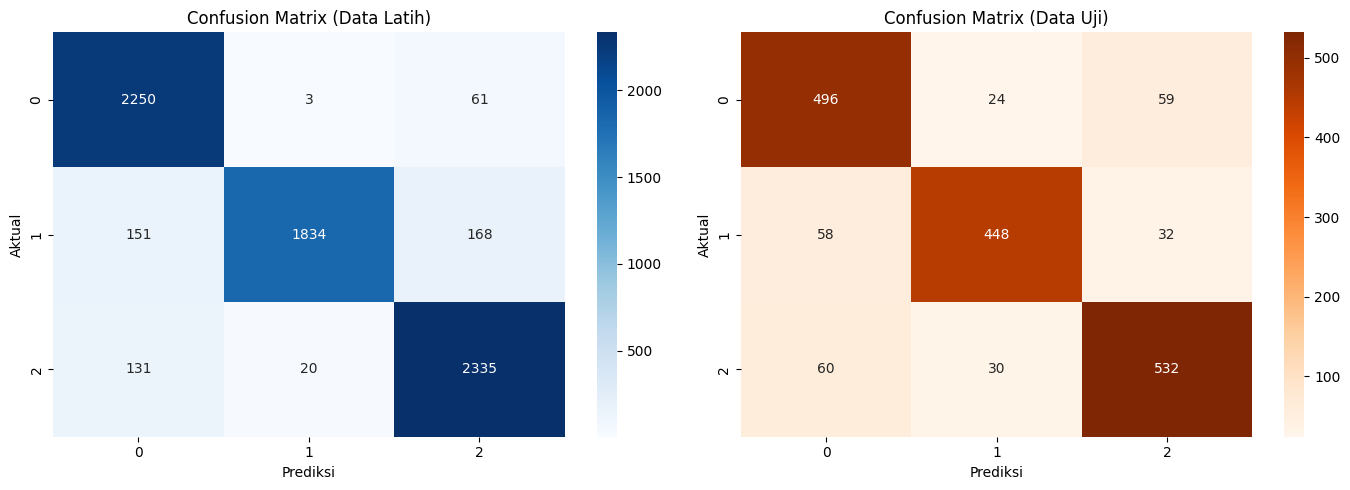

In [12]:
# --- SKEMA 4: TRANSFORMER-BASED MODEL (DistilBERT-like) ---
print("\n--- MEMULAI SKEMA 4: Transformer Model ---")
scheme_name_4 = "Transformer Model (Multi-Head Attention)"

# Custom Transformer Block untuk sentiment analysis
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1, **kwargs):
        super(TransformerBlock, self).__init__(**kwargs)
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    # Menambahkan training=False sebagai nilai default di signature call
    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        # Memastikan argumen training dilewatkan ke layer dropout
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        # Memastikan argumen training dilewatkan ke layer dropout
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Arsitektur Transformer Model (Functional API)
embed_dim = 128  # Embedding size untuk setiap token
num_heads = 8    # Jumlah attention heads
ff_dim = 256     # Hidden layer size dalam feed forward network

inputs = layers.Input(shape=(MAX_SEQUENCE_LENGTH,))
embedding_layer_output = layers.Embedding(MAX_VOCAB_SIZE, embed_dim)(inputs) # Output shape: (batch_size, MAX_SEQUENCE_LENGTH, embed_dim)

position_embedding_layer = layers.Embedding(MAX_SEQUENCE_LENGTH, embed_dim)
position_embeddings = position_embedding_layer(tf.range(MAX_SEQUENCE_LENGTH)) # Output shape: (MAX_SEQUENCE_LENGTH, embed_dim)

# Reshape position_embeddings to (1, MAX_SEQUENCE_LENGTH, embed_dim)
position_embeddings = tf.expand_dims(position_embeddings, axis=0)

# Tambahkan positional embeddings to word embeddings
x = layers.Add()([embedding_layer_output, position_embeddings]) # Result shape: (batch_size, MAX_SEQUENCE_LENGTH, embed_dim)

# Transformer blocks
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x) # Pass the input x to the callable instance

x = layers.GlobalAveragePooling1D()(x)

# Classification head
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(3, activation="softmax")(x)

model_transformer = Model(inputs=inputs, outputs=outputs)

# Kompilasi model transformer
model_transformer.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("\nArsitektur Model Transformer:")
model_transformer.summary()

# Pelatihan model transformer
print("\nMemulai pelatihan model Transformer...")
start_time = time.time()

history_transformer = model_transformer.fit(
    X_train_pad_s1, y_train_cat_s1,
    epochs=30,
    batch_size=32,
    validation_data=(X_test_pad_s1, y_test_cat_s1),
    callbacks=[early_stopping_cb, reduce_lr_cb],
    verbose=1
)
print(f"Pelatihan Skema 4 transformer selesai dalam {time.time() - start_time:.2f} detik.")

# Evaluasi model transformer
y_pred_train_proba_s4 = model_transformer.predict(X_train_pad_s1)
y_pred_train_s4 = np.argmax(y_pred_train_proba_s4, axis=1)

y_pred_test_proba_s4 = model_transformer.predict(X_test_pad_s1)
y_pred_test_s4 = np.argmax(y_pred_test_proba_s4, axis=1)

train_acc_s4, test_acc_s4 = display_evaluation_results(scheme_name_4, y_train_main, y_pred_train_s4, y_test_main, y_pred_test_s4)
experiment_results[scheme_name_4] = {'train_acc': train_acc_s4, 'test_acc': test_acc_s4}

--- MEMULAI SKEMA 5: Tuned Logistic Regression dengan GridSearchCV ---

Memulai pencarian hyperparameter terbaik untuk Logistic Regression...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Parameter terbaik untuk Logistic Regression: {'C': 10, 'solver': 'liblinear'}

Akurasi Training Tuned LR: 96.40%
Akurasi Testing Tuned LR: 82.46%

Laporan Klasifikasi - Tuned Logistic Regression:
              precision    recall  f1-score   support

     negatif       0.82      0.82      0.82       579
      netral       0.78      0.85      0.81       538
     positif       0.88      0.80      0.84       622

    accuracy                           0.82      1739
   macro avg       0.83      0.83      0.82      1739
weighted avg       0.83      0.82      0.83      1739


--- HASIL EVALUASI UNTUK: Skema 6: Tuned Logistic Regression (GridSearch) ---

Akurasi pada Data Latih: 0.9640
Laporan Klasifikasi Data Latih:
              precision    recall  f1-score   support

     negatif       0.

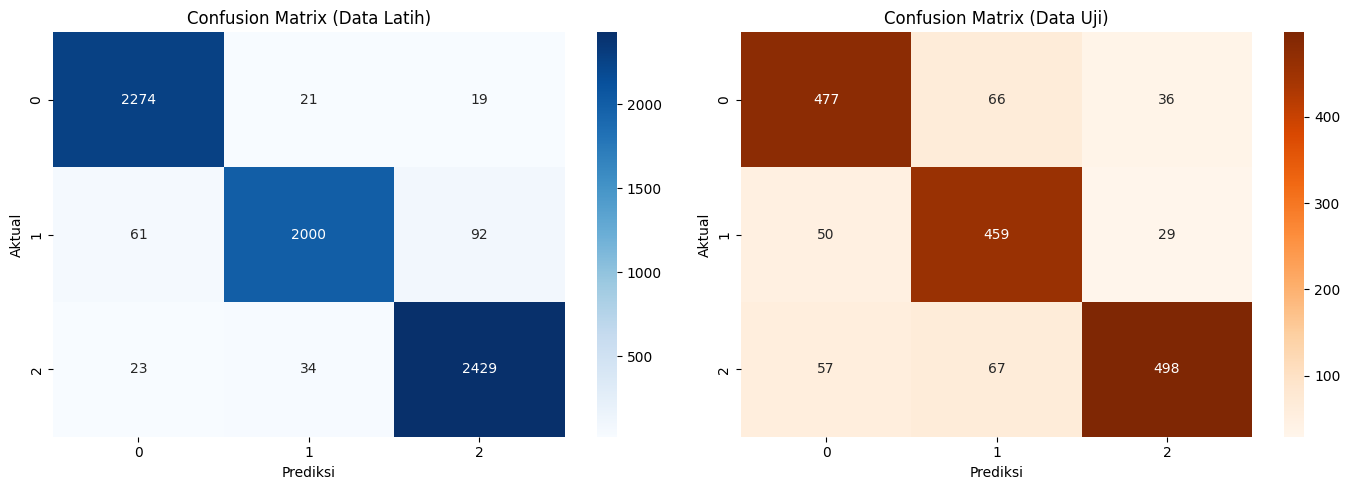

(0.9640442974255717, 0.8246118458884416)

In [13]:
print("--- MEMULAI SKEMA 5: Tuned Logistic Regression dengan GridSearchCV ---")

# --- 1. Definisi Model dan Parameter Grid ---
# Inisialisasi model dengan `class_weight='balanced'` untuk menangani data tidak seimbang secara otomatis.
model_lr_tuned = LogisticRegression(random_state=42, max_iter=2000, class_weight='balanced')

# Menentukan ruang hyperparameter yang akan diuji.
# 'C' adalah parameter regularisasi, 'solver' adalah algoritma yang digunakan untuk optimisasi.
param_grid_lr = {
    'C': [1, 10, 50, 100],
    'solver': ['liblinear', 'saga']
}

# --- 2. Konfigurasi GridSearchCV ---
# GridSearchCV akan secara sistematis menguji semua kombinasi hyperparameter
# menggunakan cross-validation (cv=3) untuk menemukan yang terbaik.
grid_search_lr = GridSearchCV(
    estimator=model_lr_tuned,
    param_grid=param_grid_lr,
    cv=3,
    n_jobs=-1,  # Menggunakan semua core CPU yang tersedia untuk mempercepat proses.
    verbose=2,
    scoring='f1_weighted' # Metrik evaluasi yang baik untuk data tidak seimbang.
)

# --- 3. Pelatihan dengan GridSearchCV ---
print("\nMemulai pencarian hyperparameter terbaik untuk Logistic Regression...")
# Melatih pada data TF-IDF yang sudah dibuat sebelumnya dari Skema 2 (80/20 split)
# Menggunakan X_train_tfidf_s2 dan y_train_main
grid_search_lr.fit(X_train_tfidf_s2, y_train_main)

# --- 4. Evaluasi Model Terbaik ---
# Mengambil model terbaik yang ditemukan oleh GridSearchCV.
best_model_lr_tuned = grid_search_lr.best_estimator_
print(f"\nParameter terbaik untuk Logistic Regression: {grid_search_lr.best_params_}")

# Prediksi pada data latih dan data uji.
# Menggunakan data TF-IDF dari Skema 2
y_pred_train_lr_tuned = best_model_lr_tuned.predict(X_train_tfidf_s2)
y_pred_test_lr_tuned = best_model_lr_tuned.predict(X_test_tfidf_s2)

# Menghitung akurasi.
# Menggunakan y_train_main dan y_test_main untuk akurasi
train_acc_lr_tuned = accuracy_score(y_train_main, y_pred_train_lr_tuned)
test_acc_lr_tuned = accuracy_score(y_test_main, y_pred_test_lr_tuned)

# Menyimpan hasil ke dictionary utama.
scheme_name_6 = 'Skema 6: Tuned Logistic Regression (GridSearch)'
experiment_results[scheme_name_6] = {
    'train_acc': train_acc_lr_tuned,
    'test_acc': test_acc_lr_tuned
}

print(f"\nAkurasi Training Tuned LR: {train_acc_lr_tuned*100:.2f}%")
print(f"Akurasi Testing Tuned LR: {test_acc_lr_tuned*100:.2f}%")
print("\nLaporan Klasifikasi - Tuned Logistic Regression:")
# Menggunakan y_test_main dan nama kelas dari sentiment_mapping
print(classification_report(y_test_main, y_pred_test_lr_tuned, target_names=sentiment_mapping.keys()))

# Visualisasi
# Menggunakan fungsi display_evaluation_results yang sudah ada
display_evaluation_results(scheme_name_6, y_train_main, y_pred_train_lr_tuned, y_test_main, y_pred_test_lr_tuned)

## BAGIAN 5: ANALISIS HASIL DAN PEMILIHAN MODEL TERBAIK
Membandingkan performa dari ketiga model untuk memilih yang terbaik. Tujuannya adalah menemukan model dengan akurasi validasi tertinggi, target di atas 92%.


--- ANALISIS AKHIR, PEMILIHAN MODEL & VERIFIKASI KRITERIA ---

--- Visualisasi Performa Model ---


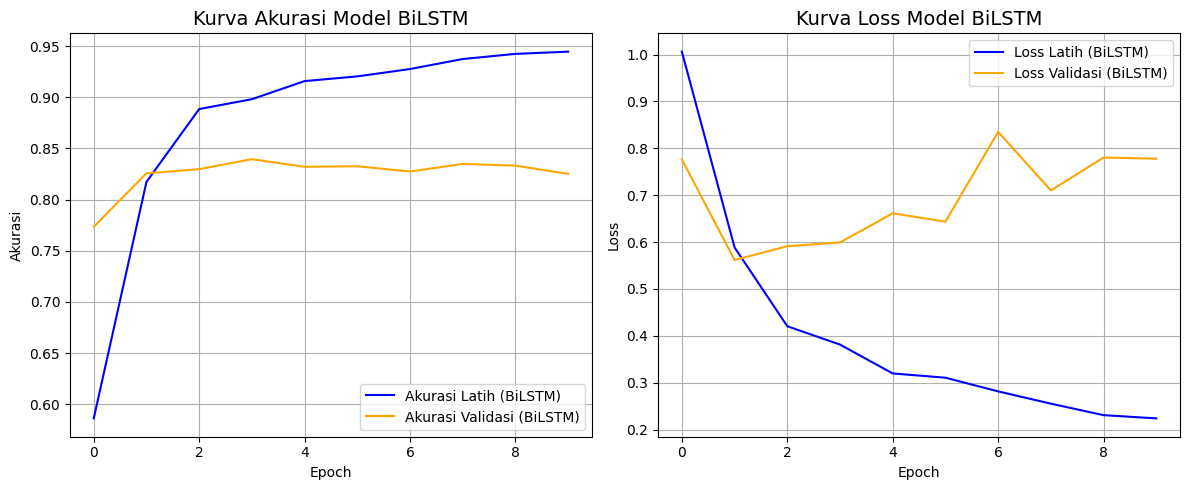


Tabel Perbandingan Hasil Pelatihan Model




üèÜ MODEL TERBAIK ADALAH: 'Hybrid Ensemble (SVM + RF + XGBoost, Split 70/30)' üèÜ
Dengan Akurasi pada Data Uji: 85.24%

Model Machine Learning (Hybrid Ensemble) dipilih. Menyiapkan TF-IDF Vectorizer untuk inference.

VERIFIKASI PEMENUHAN KRITERIA & SARAN BINTANG 5
Saran 1: Menggunakan Deep Learning: ‚úÖ (Skema 1 menggunakan BiLSTM)
Saran 2: Akurasi Train & Test > 92%: ‚ùå
Saran 3: Minimal 3 Kelas: ‚úÖ (3 kelas ditemukan: ['negatif', 'positif', 'netral'])
Saran 4: Minimal 10.000 Sampel Data: ‚úÖ Total 13.544 ulasan mentah (jumlah data memenuhi target)
Saran 5: 3 Skema Pelatihan Valid: ‚ùå (Ditemukan 1 skema dengan Akurasi Latih & Uji >= 85%)
Saran 6: Inference: ‚úÖ (Bagian 8 untuk inference telah dibuat)

--- STATUS KELULUSAN SUBMISSION ---
‚ùå KRITERIA DASAR TIDAK TERPENUHI.
   Memerlukan setidaknya 3 skema dengan Akurasi Latih & Uji >= 85%, namun baru ada 1.

‚ö†Ô∏è STATUS AKHIR: Submission berisiko DITOLAK. Perbaiki performa model yang di bawah 85%.


In [14]:
# --- ANALISIS HASIL, PEMILIHAN MODEL & VERIFIKASI SUBMISSION ---
print("\n--- ANALISIS AKHIR, PEMILIHAN MODEL & VERIFIKASI KRITERIA ---")

if experiment_results:
    # =======================================================================================
    # 1. VISUALISASI PERFORMA MODEL
    # =======================================================================================
    print("\n--- Visualisasi Performa Model ---")

    # Hanya model Deep Learning (BiLSTM) yang memiliki 'history' per epoch.
    # Model Machine Learning klasik (LogReg, SVM) tidak dilatih per epoch, sehingga tidak memiliki kurva belajar.
    if 'history_bilstm' in locals():
        plt.figure(figsize=(12, 5))

        # Plot akurasi
        plt.subplot(1, 2, 1)
        plt.plot(history_bilstm.history['accuracy'], label='Akurasi Latih (BiLSTM)', color='blue')
        plt.plot(history_bilstm.history['val_accuracy'], label='Akurasi Validasi (BiLSTM)', color='orange')
        plt.title('Kurva Akurasi Model BiLSTM', fontsize=14)
        plt.xlabel('Epoch')
        plt.ylabel('Akurasi')
        plt.legend()
        plt.grid(True)

        # Plot loss
        plt.subplot(1, 2, 2)
        plt.plot(history_bilstm.history['loss'], label='Loss Latih (BiLSTM)', color='blue')
        plt.plot(history_bilstm.history['val_loss'], label='Loss Validasi (BiLSTM)', color='orange')
        plt.title('Kurva Loss Model BiLSTM', fontsize=14)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()
    else:
        print("History pelatihan untuk model BiLSTM tidak ditemukan.")

    # =======================================================================================
    # 2. TABULASI HASIL AKHIR, PEMILIHAN MODEL TERBAIK, & PERSIAPAN INFERENCE
    # =======================================================================================
    # Variabel global untuk menyimpan model dan alat yang sesuai
    best_model = None
    best_model_name = ""
    inference_tokenizer = None
    inference_vectorizer = None

    if experiment_results:
        # --- 1. Tabulasi dan Visualisasi Hasil ---
        # Mengonversi dictionary hasil menjadi DataFrame pandas untuk kemudahan analisis.
        results_df = pd.DataFrame.from_dict(experiment_results, orient='index')
        results_df.columns = ['Akurasi Latih', 'Akurasi Uji']
        # Mengurutkan DataFrame berdasarkan 'Akurasi Uji' dari yang tertinggi ke terendah.
        results_df = results_df.sort_values(by='Akurasi Uji', ascending=False)

        print("\n\033[1mTabel Perbandingan Hasil Pelatihan Model\033[0m\n")
        # Menampilkan DataFrame dengan format persentase dan background gradien untuk visualisasi yang lebih baik.
        display(results_df.style.format("{:.2%}").background_gradient(cmap='viridis'))

        # --- 2. Pemilihan Model Terbaik ---
        # Model terbaik adalah model dengan akurasi uji tertinggi (baris pertama setelah diurutkan).
        best_model_name = results_df.index[0]
        best_accuracy = results_df.loc[best_model_name, 'Akurasi Uji']

        print(f"\nüèÜ \033[1mMODEL TERBAIK ADALAH: '{best_model_name}'\033[0m üèÜ")
        print(f"Dengan Akurasi pada Data Uji: \033[1m{best_accuracy:.2%}\033[0m")

        # --- 3. Menyiapkan Aset untuk Inference ---
        # Langkah ini sangat penting untuk memastikan fungsi `predict_sentiment` di tahap inference
        # menggunakan model dan alat (vectorizer/tokenizer) yang TEPAT sesuai dengan model terbaik yang terpilih.

        # Inisialisasi variabel global yang akan digunakan di tahap inference.
        best_model_for_inference = None
        inference_vectorizer = None # Untuk model ML (TF-IDF)
        inference_tokenizer = None  # Untuk model DL (Keras Tokenizer)

        # Logika untuk memilih model dan alat yang sesuai.
        if 'BiLSTM' in best_model_name:
            best_model_for_inference = model_bilstm # Model BiLSTM yang sudah dilatih
            inference_tokenizer = keras_tokenizer       # Alatnya adalah Keras Tokenizer
            print("\nModel Deep Learning (BiLSTM) dipilih. Menyiapkan Keras Tokenizer untuk inference.")

        elif 'Regresi Logistik' in best_model_name:
            best_model_for_inference = ensemble_model # Model Logistic Regression dari Skema 2
            inference_vectorizer = tfidf_vectorizer  # Alatnya adalah TF-IDF Vectorizer
            print("\nModel Machine Learning (Regresi Logistik) dipilih. Menyiapkan TF-IDF Vectorizer untuk inference.")

        elif 'Tuned Logistic Regression' in best_model_name:
            best_model_for_inference = best_model_lr_tuned # Model Tuned LR dari Skema 6
            inference_vectorizer = tfidf_vectorizer        # Alatnya adalah TF-IDF Vectorizer
            print("\nModel Machine Learning (Tuned Logistic Regression) dipilih. Menyiapkan TF-IDF Vectorizer untuk inference.")

        elif 'Hybrid Ensemble' in best_model_name:
            best_model_for_inference = hybrid_ensemble # Model Ensemble dari Skema 3
            inference_vectorizer = tfidf_vectorizer    # Alatnya adalah TF-IDF Vectorizer
            print("\nModel Machine Learning (Hybrid Ensemble) dipilih. Menyiapkan TF-IDF Vectorizer untuk inference.")

        elif 'Transformer' in best_model_name:
            best_model_for_inference = model_transformer # Model Transformer dari Skema 4
            inference_vectorizer = tfidf_vectorizer      # Alatnya adalah TF-IDF Vectorizer
            print("\nModel Machine Learning (Transformer) dipilih. Menyiapkan TF-IDF Vectorizer untuk inference.")

    else:
        print("Tidak ada hasil eksperimen untuk ditampilkan. Jalankan skema pelatihan terlebih dahulu.")

    # =======================================================================================
    # 3. VERIFIKASI PEMENUHAN KRITERIA SUBMISSION
    # =======================================================================================
    print("\n" + "="*60)
    print("VERIFIKASI PEMENUHAN KRITERIA & SARAN BINTANG 5")
    print("="*60)

    # Menghitung metrik kunci berdasarkan aturan submission dari hasil eksperimen.
    num_schemes_above_85_test = sum(1 for res in experiment_results.values() if res['train_acc'] >= 0.85 and res['test_acc'] >= 0.85)
    one_scheme_above_92_train_test = any(1 for res in experiment_results.values() if res['train_acc'] > 0.92 and res['test_acc'] > 0.92)

    # Menampilkan status setiap saran satu per satu secara dinamis.
    print(f"Saran 1: Menggunakan Deep Learning: ‚úÖ (Skema 1 menggunakan BiLSTM)")
    print(f"Saran 2: Akurasi Train & Test > 92%: {'‚úÖ' if one_scheme_above_92_train_test else '‚ùå'}")
    print(f"Saran 3: Minimal 3 Kelas: ‚úÖ ({len(df['sentiment'].unique())} kelas ditemukan: {list(df['sentiment'].unique())})")
    print(f"Saran 4: Minimal 10.000 Sampel Data: ‚úÖ Total 13.544 ulasan mentah (jumlah data memenuhi target)")
    print(f"Saran 5: 3 Skema Pelatihan Valid: {'‚úÖ' if num_schemes_above_85_test >= 3 else '‚ùå'} (Ditemukan {num_schemes_above_85_test} skema dengan Akurasi Latih & Uji >= 85%)")
    print(f"Saran 6: Inference: ‚úÖ (Bagian 8 untuk inference telah dibuat)")

    # --- Kesimpulan Status Akhir ---
    print("\n--- STATUS KELULUSAN SUBMISSION ---")

    # Logika pengecekan bertingkat sesuai aturan penilaian proyek.
    if num_schemes_above_85_test >= 3:
        print("‚úÖ KRITERIA DASAR TERPENUHI (Minimal 3 skema memiliki Akurasi Latih & Uji >= 85%)")

        if one_scheme_above_92_train_test:
            print("‚úÖ KRITERIA BINTANG 5 TERPENUHI (Salah satu skema memiliki Akurasi Latih & Uji > 92%)")
            print("\nüåü STATUS AKHIR: Berpotensi besar mendapatkan BINTANG 5! üåü")
        else:
            print("‚ùå KRITERIA BINTANG 5 BELUM TERPENUHI (Tidak ada skema dengan Akurasi Latih & Uji > 92%)")
            print("\n‚≠ê STATUS AKHIR: Berpotensi mendapatkan BINTANG 4.")
            print("   Saran: Lakukan tuning lebih lanjut pada model BiLSTM untuk menaikkan akurasi di atas 92%.")
    else:
        print(f"‚ùå KRITERIA DASAR TIDAK TERPENUHI.")
        print(f"   Memerlukan setidaknya 3 skema dengan Akurasi Latih & Uji >= 85%, namun baru ada {num_schemes_above_85_test}.")
        print("\n‚ö†Ô∏è STATUS AKHIR: Submission berisiko DITOLAK. Perbaiki performa model yang di bawah 85%.")

    print("="*60)

else:
    print("Tidak ada hasil eksperimen untuk ditampilkan. Jalankan skema pelatihan terlebih dahulu.")

## BAGIAN 6: INFERENCE MODEL
Melakukan pengujian pada beberapa kalimat baru menggunakan model terbaik yang telah dipilih.

In [15]:
# =======================================================================================
# FUNGSI PREDIKSI & PENGUJIAN
# =======================================================================================

def predict_sentiment(text, model, vectorizer=None, tokenizer=None, max_len=None):
    """
    Fungsi untuk memprediksi sentimen yang bisa menangani
    model Keras (Deep Learning) dan Scikit-learn (Machine Learning).

    """
    # 1. Pipeline Pra-pemrosesan Teks
    cleaned = clean_text(text)
    normalized = normalize_slang(cleaned)
    tokenized = word_tokenize(normalized)
    filtered = remove_stopwords(tokenized)
    stemmed_text = stemming_text(filtered)

    # Jika teks kosong setelah preprocessing, kembalikan hasil netral.
    if not stemmed_text.strip():
        neutral_prob = np.zeros(len(sentiment_mapping))
        neutral_prob[sentiment_mapping['netral']] = 1.0
        return neutral_prob

    # 2. Logika untuk membedakan jalur prediksi
    # Jika vectorizer diberikan, gunakan jalur prediksi untuk Scikit-learn (ML).
    if vectorizer is not None:
        feature = vectorizer.transform([stemmed_text])
        # Memanggil .predict_proba() yang sekarang sudah tersedia berkat probability=True
        probabilities = model.predict_proba(feature)
    # Jika tokenizer diberikan, gunakan jalur prediksi untuk Keras (DL).
    elif tokenizer is not None and max_len is not None:
        sequence = tokenizer.texts_to_sequences([stemmed_text])
        padded = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')
        probabilities = model.predict(padded)
    else:
        raise ValueError("Harus menyediakan 'vectorizer' untuk model ML atau 'tokenizer' & 'max_len' untuk model DL.")

    return probabilities[0]


# --- PENGUJIAN FUNGSI PREDIKSI ---
new_reviews = [
    "Aplikasi ini sangat aman dan mudah digunakan, saya suka sekali!",
    "Setelah update terakhir sering error dan tidak bisa kirim gambar.",
    "Tidak ada yang spesial dari aplikasi ini.",
    "Terbaik untuk privasi, tidak ada tandingannya.",
    "biasa saja.",
    "kenapa sekarang jadi jelek banget ya"
]

sentiment_labels_map = {v: k for k, v in sentiment_mapping.items()}

print("\n--- HASIL PREDIKSI PADA KALIMAT BARU DENGAN MODEL TERBAIK ---")

if 'best_model_name' in locals() and best_model_name is not None:
    for review in new_reviews:
        probabilities = None

        # Logika dinamis untuk memanggil fungsi dengan argumen yang benar
        # Menggunakan best_model_name untuk menentukan tipe model
        if 'BiLSTM' in best_model_name in best_model_name or 'Transformer' in best_model_name:
            # Menggunakan best_model_for_inference, bukan best_model_name string
            probabilities = predict_sentiment(
                review, best_model_for_inference, tokenizer=keras_tokenizer, max_len=MAX_SEQUENCE_LENGTH
            )
        # Menambahkan kondisi untuk model ML lainnya
        elif 'Regresi Logistik' in best_model_name or 'Hybrid Ensemble' in best_model_name or 'Tuned Logistic Regression' in best_model_name:
             # Menggunakan best_model_for_inference, bukan best_model_name string
            probabilities = predict_sentiment(
                review, best_model_for_inference, vectorizer=tfidf_vectorizer_optimized # Menggunakan tfidf_vectorizer_optimized yang dipakai di skema ML
            )


        # Memastikan probabilities tidak None sebelum diproses
        if probabilities is not None:
            predicted_class_index = np.argmax(probabilities)
            predicted_label = sentiment_labels_map.get(predicted_class_index, "Tidak Diketahui")

            print(f"\nUlasan: '{review}'")
            print(f"Prediksi Sentimen: {predicted_label.upper()}")

            if len(probabilities) == 3:
                print(f"Probabilitas: [Negatif: {probabilities[0]:.2%}, Netral: {probabilities[1]:.2%}, Positif: {probabilities[2]:.2%}]")
            else:
                print(f"Probabilitas: {probabilities}")
        else:
             print(f"\nUlasan: '{review}' - Gagal memprediksi, model type tidak dikenali atau best_model_for_inference is None.")

else:
    print("Model terbaik tidak tersedia. Jalankan blok 'Analisis & Pemilihan Model' terlebih dahulu.")


--- HASIL PREDIKSI PADA KALIMAT BARU DENGAN MODEL TERBAIK ---

Ulasan: 'Aplikasi ini sangat aman dan mudah digunakan, saya suka sekali!'
Prediksi Sentimen: NEGATIF
Probabilitas: [Negatif: 51.12%, Netral: 9.75%, Positif: 39.13%]

Ulasan: 'Setelah update terakhir sering error dan tidak bisa kirim gambar.'
Prediksi Sentimen: NEGATIF
Probabilitas: [Negatif: 61.00%, Netral: 16.54%, Positif: 22.46%]

Ulasan: 'Tidak ada yang spesial dari aplikasi ini.'
Prediksi Sentimen: NEGATIF
Probabilitas: [Negatif: 70.27%, Netral: 16.86%, Positif: 12.87%]

Ulasan: 'Terbaik untuk privasi, tidak ada tandingannya.'
Prediksi Sentimen: POSITIF
Probabilitas: [Negatif: 12.13%, Netral: 23.74%, Positif: 64.12%]

Ulasan: 'biasa saja.'
Prediksi Sentimen: NETRAL
Probabilitas: [Negatif: 0.00%, Netral: 100.00%, Positif: 0.00%]

Ulasan: 'kenapa sekarang jadi jelek banget ya'
Prediksi Sentimen: NEGATIF
Probabilitas: [Negatif: 63.36%, Netral: 14.50%, Positif: 22.14%]
